[*********************100%***********************]  1 of 1 completed


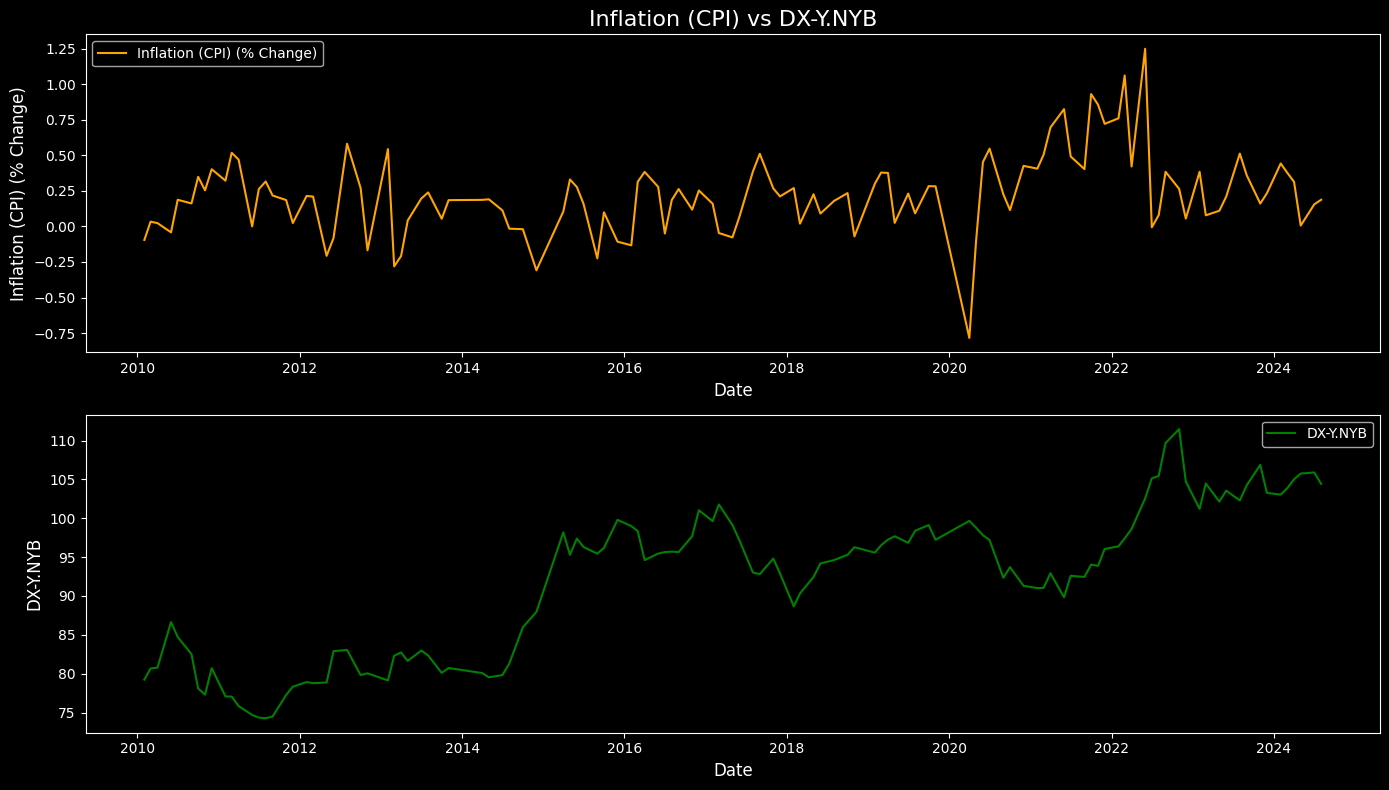

Correlation between Inflation (CPI) and DX-Y.NYB: 0.10


In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from fredapi import Fred

# Define the function to analyze any economic variable vs financial index
def econ_vs_index_analysis(start_date, end_date, econ_variable, econ_variable_name, index_symbol, fred_api_key):
    # Initialize FRED API
    fred = Fred(api_key=fred_api_key)

    # Fetch the economic data (e.g., CPI, GDP, Unemployment) from FRED
    try:
        econ_data = fred.get_series(econ_variable, start=start_date, end=end_date)
    except Exception as e:
        print(f"Error fetching {econ_variable_name} data from FRED: {e}")
        econ_data = pd.Series()

    # Fetch the financial index data from yfinance
    try:
        financial_index = yf.download(index_symbol, start=start_date, end=end_date)
    except Exception as e:
        print(f"Error fetching index data from yfinance: {e}")
        financial_index = pd.DataFrame()

    # Combine data into a single DataFrame and calculate percentage change for the economic variable
    if not econ_data.empty and not financial_index.empty:
        econ_data_pct_change = econ_data.pct_change() * 100  # Convert economic data to percentage change
        combined_df = pd.DataFrame({
            f'{econ_variable_name} (% Change)': econ_data_pct_change,
            'Financial Index': financial_index['Close']
        }).dropna()

        # Plotting with black background
        plt.style.use('dark_background')
        plt.figure(figsize=(14, 8))

        # Plot Economic Variable (% Change)
        plt.subplot(2, 1, 1)
        plt.plot(combined_df.index, combined_df[f'{econ_variable_name} (% Change)'], label=f'{econ_variable_name} (% Change)', color='orange')
        plt.title(f'{econ_variable_name} vs {index_symbol}', fontsize=16)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel(f'{econ_variable_name} (% Change)', fontsize=12)
        plt.legend()

        # Plot Financial Index
        plt.subplot(2, 1, 2)
        plt.plot(combined_df.index, combined_df['Financial Index'], label=f'{index_symbol}', color='green')
        plt.xlabel('Date', fontsize=12)
        plt.ylabel(f'{index_symbol}', fontsize=12)
        plt.legend()

        plt.tight_layout()
        plt.show()

        # Correlation Analysis
        correlation = combined_df[f'{econ_variable_name} (% Change)'].corr(combined_df['Financial Index'])
        print(f"Correlation between {econ_variable_name} and {index_symbol}: {correlation:.2f}")
    else:
        print("Data is not available for the specified time range or index.")

# Example usage of the function
start_date = '2010-01-01'
end_date = '2024-10-01'
econ_variable = 'CPIAUCSL'  # CPI (Inflation)
econ_variable_name = 'Inflation (CPI)'  # Name for the economic variable
index_symbol = 'DX-Y.NYB'  # U.S. Dollar Index symbol for Yahoo Finance
fred_api_key = 'Enter Your Key'

# Call the function with the desired parameters
econ_vs_index_analysis(start_date, end_date, econ_variable, econ_variable_name, index_symbol, fred_api_key)


[*********************100%***********************]  1 of 1 completed


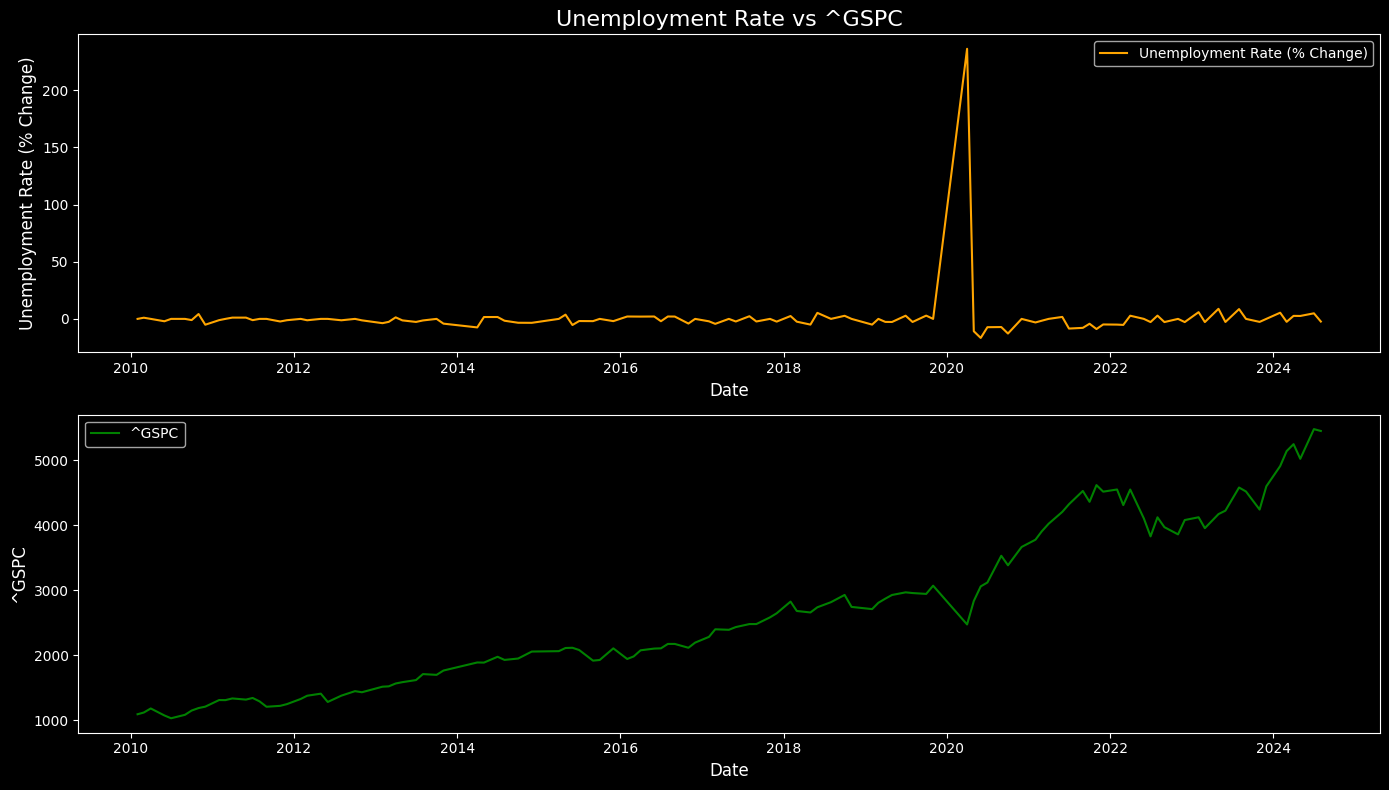

Correlation between Unemployment Rate and ^GSPC: -0.02


In [2]:
econ_vs_index_analysis(start_date, end_date, 'UNRATE', 'Unemployment Rate', '^GSPC', fred_api_key)

[*********************100%***********************]  1 of 1 completed


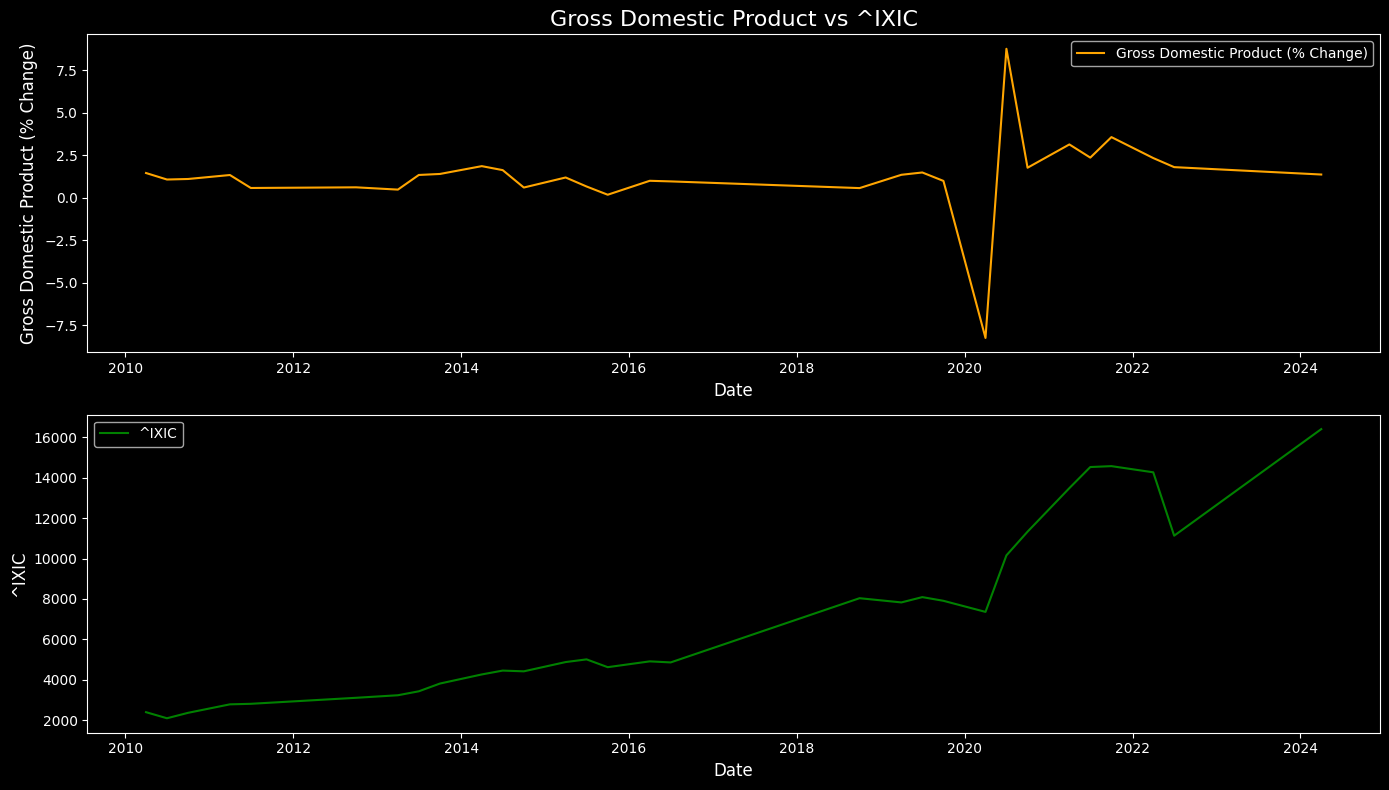

Correlation between Gross Domestic Product and ^IXIC: 0.28


In [3]:
econ_vs_index_analysis(start_date, end_date, 'GDP', 'Gross Domestic Product', '^IXIC', fred_api_key)
